In [2]:
!pip install gensim 

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   -------------- ------------------------- 8.7/24.4 MB 47.8 MB/s eta 0:00:01
   ------------------------------- -------- 19.1/24.4 MB 47.9 MB/s eta 0:00:01
   ---------------------------------------- 24.4/24.4 MB 44.9 MB/s  0:00:00

   -------------------------- ------------- 2/3 [gensim]
   -------------------------- ------------- 2/3 [gensim]
   -------------------------- ------------- 2/3 [gensim]
   -------------------------- ------------- 2/3 [gensim]
   ---------------------------------------- 3/3 [gensim]



In [3]:
import jieba
import re
import numpy as np 
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib


In [11]:
import jieba
import re

f = open("../../data/sanguo.txt", 'r', encoding="utf-8")
lines = []

# 定义正则表达式：匹配所有中英文标点和特殊字符
pattern = re.compile(r"[\s+\.\!\/_,$%^*(+\"\“”《》‘’！？。，、~@#￥……&*（）【】—：；‘’]+|[^\w\u4e00-\u9fa5]+")

for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        # 用正则清理符号
        clean_word = re.sub(pattern, "", i)
        if len(clean_word) > 0:
            words.append(clean_word)
    if len(words) > 0:
        lines.append(words)

f.close()

print(lines[0:5])


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['调寄', '临江仙']]


In [23]:
model = Word2Vec(lines,vector_size=20,min_count=3,epochs=10, sg=1, negative=10)

In [20]:
print('刘备的词向量:\n', model.wv.get_vector('刘备'))

刘备的词向量:
 [-0.80305755 -0.5287995   0.26429573  0.05547623 -0.45800564 -0.11367215
  0.1900609   0.9241672  -0.7550228   0.09728266  0.30429983 -0.39825812
 -0.5801772  -0.71358657  0.5064417  -0.0115563   0.35662523 -0.68351215
 -0.7212361  -0.08670952]


In [25]:
model.wv.most_similar('孔明',topn=10)

[('庞统', 0.9133678078651428),
 ('孔明遂', 0.8601166605949402),
 ('数杯', 0.8490480780601501),
 ('馆舍', 0.8449077606201172),
 ('玄德', 0.8437319993972778),
 ('鲁肃', 0.8421294093132019),
 ('计会', 0.8328067660331726),
 ('孙夫人', 0.8220034837722778),
 ('吴国太', 0.8186444044113159),
 ('孔明辞', 0.8179340362548828)]

In [27]:
raw_wordvec = []
word2ind = {}
for i ,w in enumerate(model.wv.index_to_key):
    raw_wordvec.append(model.wv[w])
    word2ind[w] = i

raw_wordvec = np.array(raw_wordvec)
X_reduced  = PCA(n_components=2).fit_transform(raw_wordvec)


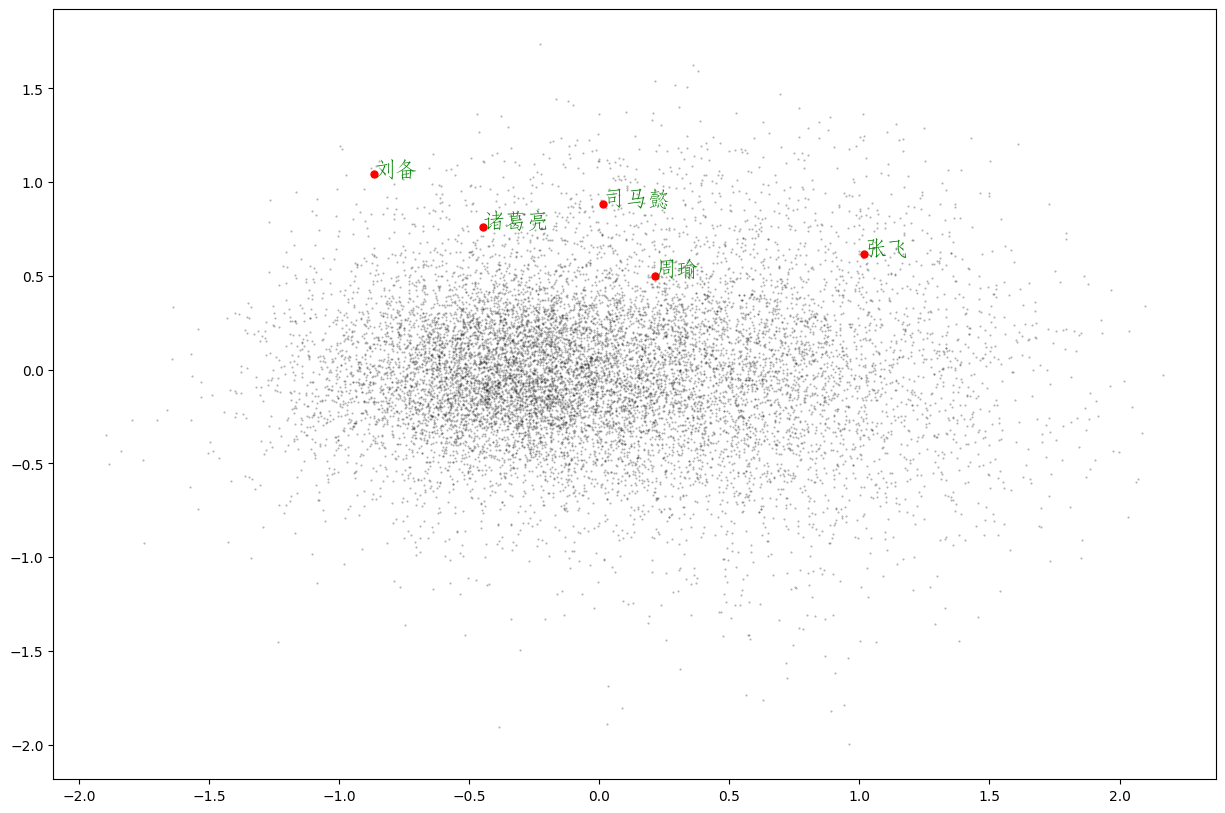

In [32]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:,0],X_reduced[:,1],'.',markersize =1,alpha=0.3,color = 'black')

words = ['刘备','周瑜','诸葛亮','司马懿','张飞']
font = matplotlib.font_manager.FontProperties(fname='../../data/华文仿宋.ttf',size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0],xy[1],'.',alpha=1,color='red',markersize = 10)
        plt.text(xy[0],xy[1],w,fontproperties=font,alpha=1,color='green')